In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Two-Dimensional NumPy Arrays

In [2]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    max_station = ridership[0,:].argmax()
    overall_mean = ridership.mean()
    mean_for_max = ridership[:,max_station].mean()
    
    return (overall_mean, mean_for_max)

print mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)


## NumPy Axis

In [3]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    mean_ridership = ridership.mean(axis=0)
    max_daily_ridership = mean_ridership.max()     # Replace this with your code
    min_daily_ridership = mean_ridership.min()     # Replace this with your code
    
    return (max_daily_ridership, min_daily_ridership)

## Accessing Elements of a DataFrame

In [4]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_station = ridership.iloc[0,:].argmax()
    overall_mean = ridership.values.mean() # Replace this with your code
    mean_for_max = ridership[max_station].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

## Calculating Correlation

In [5]:
import pandas as pd

filename = 'nyc_subway_weather.csv' #'/datasets/ud170/subway/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    
    return ((x-x.mean())*(y-y.mean())).mean() / x.std(ddof=0) / y.std(ddof=0)

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


## DataFrame Vectorized Operations

In [6]:
# Cumulative entries and exits for one station for a few hours
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

print entries_and_exits, "\n"
print entries_and_exits.shift(periods=1)

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return (entries_and_exits-entries_and_exits.shift(periods=1).fillna(value=0))

   ENTRIESn   EXITSn
0   3144312  1088151
1   3144335  1088159
2   3144353  1088177
3   3144424  1088231
4   3144594  1088275
5   3144808  1088317
6   3144895  1088328
7   3144905  1088331
8   3144941  1088420
9   3145094  1088753 

    ENTRIESn     EXITSn
0        NaN        NaN
1  3144312.0  1088151.0
2  3144335.0  1088159.0
3  3144353.0  1088177.0
4  3144424.0  1088231.0
5  3144594.0  1088275.0
6  3144808.0  1088317.0
7  3144895.0  1088328.0
8  3144905.0  1088331.0
9  3144941.0  1088420.0


## DataFrame `applymap()`

In [7]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
    
def convert_grade(grade):
    '''
    Convert 1 grade from a number to a letter
    '''
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'

def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(convert_grade)

print convert_grades(grades_df)

        exam1 exam2
Andre       F     F
Barry       B     D
Chris       C     F
Dan         C     F
Emilio      B     D
Fred        C     F
Greta       A     C
Humbert     D     F
Ivan        A     C
James       B     D


## DataFrame `apply()`

In [8]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    #return df.apply(standardize_col, axis=0)
    return df.apply(lambda x: (x-x.mean()) / x.std(ddof=0), axis=0)

## DataFrame `apply()` Use Case 2

In [9]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

def second_max(col):
    max_ind = col.argmax()
    return col.loc[col.index != max_ind].max()

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(second_max, axis=0)

print second_largest(df)

a     4
b    40
c    20
dtype: int64


## Standardizing Each Column via Vectorized Operations

In [10]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    mean_col = df.mean(axis=1)
    std_col = df.std(axis=1, ddof=0)
    return df.subtract(mean_col, axis=0).div(std_col, axis=0)

print standardize_rows(grades_df)

         exam1  exam2
Andre      1.0   -1.0
Barry      1.0   -1.0
Chris      1.0   -1.0
Dan        1.0   -1.0
Emilio     1.0   -1.0
Fred       1.0   -1.0
Greta      1.0   -1.0
Humbert    1.0   -1.0
Ivan       1.0   -1.0
James      1.0   -1.0


## Pandas `groupby()`

In [11]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

filename = 'nyc_subway_weather.csv' #'/datasets/ud170/subway/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

print subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64


## Calculating Hourly Entries and Exits

In [12]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits1(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return (entries_and_exits-entries_and_exits.shift(periods=1).fillna(value=0))

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    '''
    return entries_and_exits.groupby('UNIT').transform(pd.Series.diff)

test = pd.DataFrame(
    {'ENTRIESn': [10, 40, 60, 65, 85],
     'EXITSn': [0, 10, 20, 60, 60],
     'UNIT': ['R001', 'R001', 'R001', 'R001', 'R001']},
    index=[0, 1, 2, 3, 4]
)

print test, '\n', get_hourly_entries_and_exits(test)

   ENTRIESn  EXITSn  UNIT
0        10       0  R001
1        40      10  R001
2        60      20  R001
3        65      60  R001
4        85      60  R001 
   ENTRIESn  EXITSn
0       NaN     NaN
1      30.0    10.0
2      20.0    10.0
3       5.0    40.0
4      20.0     0.0


## Combining Pandas DataFrames

In [13]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on=['DATEn','hour','latitude','longitude'], how='inner')

print combine_dfs(subway_df, weather_df)

      DATEn  ENTRIESn    EXITSn  UNIT  hour   latitude  longitude  fog  \
0  05-01-11   4388333   2911002  R003     0  40.689945 -73.872564    0   
1  05-02-11   4388348   2911036  R003     0  40.689945 -73.872564    0   
2  05-03-11   4389885   2912127  R003     0  40.689945 -73.872564    0   
3  05-04-11   4391507   2913223  R003     0  40.689945 -73.872564    0   
4  05-05-11   4393043   2914284  R003     0  40.689945 -73.872564    0   
5  05-01-11  14656120  14451774  R004     0  40.691320 -73.867135    0   
6  05-02-11  14656174  14451851  R004     0  40.691320 -73.867135    0   
7  05-03-11  14660126  14454734  R004     0  40.691320 -73.867135    0   
8  05-04-11  14664247  14457780  R004     0  40.691320 -73.867135    0   
9  05-05-11  14668301  14460818  R004     0  40.691320 -73.867135    0   

   pressurei  rain  tempi  wspdi  
0      30.24     0   52.0    8.1  
1      30.32     0   48.9    6.9  
2      30.14     0   54.0    3.5  
3      29.98     0   57.2   15.0  
4      30.

## Plotting for DataFrames

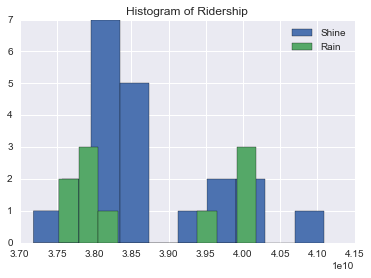

In [28]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for this block of code to see what it does

# groupby() without as_index
if False:
    first_even = example_df.groupby('even').first()
    print first_even
    print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame
    
# groupby() with as_index=False
if False:
    print 'example_df:\n', example_df, "\n"
    print 'example_df.groupby(...):\n', example_df.groupby('even').first(), "\n"
    print 'example_df.groupby(...):\n', example_df.groupby('even', as_index=False).first(), "\n"
    print 'example_df[\'even\']:\n', example_df['even'] # Now 'even' is still a column in the DataFrame

filename = 'nyc_subway_weather.csv' #'/datasets/ud170/subway/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

# In the following quiz, create a plot of your choice showing something interesting 
# about the New York subway data. For example, you might create:
# 
#   * Histograms of subway ridership on both days with rain and days without rain
#   * A scatterplot of subway stations with latitude and longitude as the x and y axes and 
#     ridership as the bubble size
#     * If you choose this option, you may wish to use the as_index=False argument to groupby(). 
#       There is example code in the following quiz.
#   * A scatterplot with subway ridership on one axis and precipitation or 
#     temperature on the other

#print subway_df.head()
#print subway_df['rain']

#print subway_df.groupby('rain').sum()['ENTRIESn_hourly']
#subway_df.loc[subway_df['rain']==0],['latitude','longitude',
#print subway_df.groupby('DATEn')['ENTRIESn','rain'].sum()

rain_or_shine = subway_df.groupby('DATEn')['ENTRIESn','rain'].sum()
shine = rain_or_shine['rain'] == 0

%matplotlib inline
rain_or_shine.loc[shine,'ENTRIESn'].hist()
rain_or_shine.loc[shine==False,'ENTRIESn'].hist()
plt.title("Histogram of Ridership")
plt.legend(['Shine','Rain'])

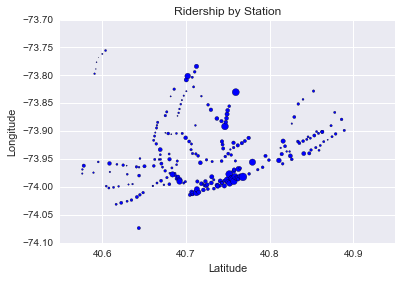

In [29]:
# from the instructor
data_by_location = subway_df.groupby(['latitude','longitude'], as_index=False).mean()
data_by_location.head()

%matplotlib inline
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=data_by_location['ENTRIESn_hourly']*10/data_by_location['ENTRIESn_hourly'].std())
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Ridership by Station')